## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

## Data Pre-Processing

In [2]:
df= pd.read_csv('hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [5]:
df.shape

(119390, 32)

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
df.drop(['company','agent'],inplace=True,axis=1) # Drop Unecessary Columns

In [8]:
df.dropna(inplace=True) # Drop Null Values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

In [10]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


In [11]:
df.describe() # Check the Outliers

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


# EDA

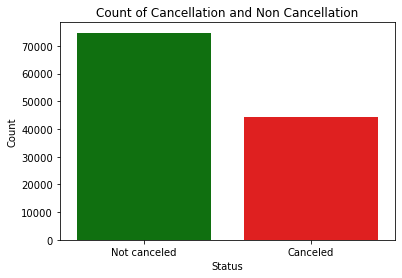

In [12]:
cancellation_count=df['is_canceled'].value_counts()
sns.barplot(x=['Not canceled','Canceled'],y=cancellation_count.values,palette=['Green', 'red'])
plt.title('Count of Cancellation and Non Cancellation')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


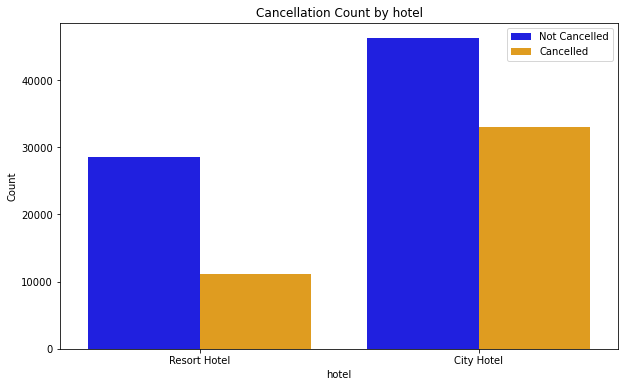

In [13]:

plt.figure(figsize=(10, 6))
sns.countplot(x='hotel', hue='is_canceled', data=df, palette=['blue', 'orange'])
plt.title('Cancellation Count by hotel')
plt.xlabel('hotel')
plt.ylabel('Count')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.show()


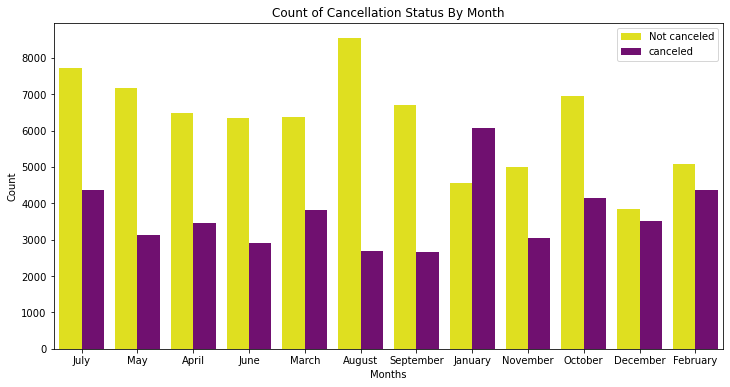

In [14]:
df['month']=df['reservation_status_date'].dt.month
d={1:'January',2:'February' ,3:'March' , 4: 'April',5: 'May',6: 'June',7:'July',8:'August',9:'September',10:'October', 
   11: 'November',12:'December'}
df['month'] = df['month'].map(d).astype(str)
plt.figure(figsize=(12,6))
sns.countplot(x='month',hue='is_canceled',data=df, palette=['yellow', 'purple'])
plt.title('Count of Cancellation Status By Month')
plt.xlabel('Months')
plt.ylabel('Count')
plt.legend(['Not canceled','canceled'])

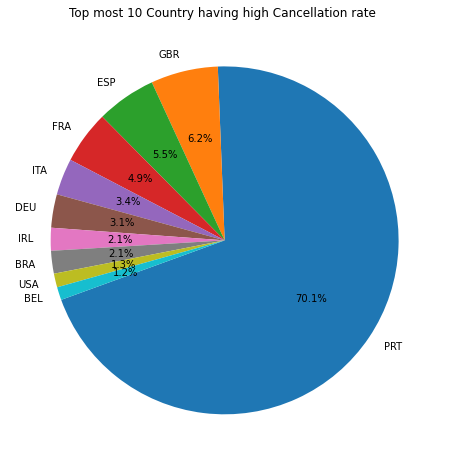

In [23]:
Canceled_Count=df[df['is_canceled']==1]
Country_count=Canceled_Count['country'].value_counts()[:10]
plt.figure(figsize=(10, 8))
plt.pie(Country_count,labels=Country_count.index,autopct='%.1f%%', startangle=200)
plt.title('Top most 10 Country having high Cancellation rate ')
plt.show()

Text(0, 0.5, 'Sum of Average Daily Rate')

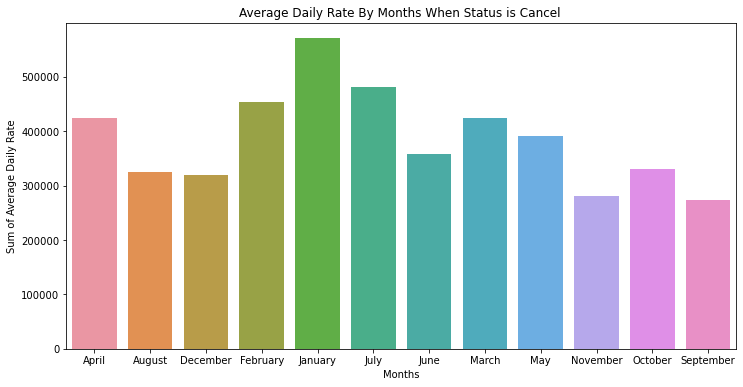

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x='month',y='adr',data=df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.title('Average Daily Rate By Months When Status is Cancel ')
plt.xlabel('Months')
plt.ylabel('Sum of Average Daily Rate')

### Convert object dtype to Category dtype for Machine learning 

In [17]:
for col in df.describe(include='object'): # Describe the object Dtype Columns and finds the Unique value 
    print(col)
    print(df[col].unique()) 

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' '

## Feature Selection

In [18]:
sc=['hotel','reservation_status','arrival_date_year','is_repeated_guest','required_car_parking_spaces','meal','customer_type','reserved_room_type','assigned_room_type','deposit_type','adr','market_segment','adults','babies','children','is_canceled']

In [19]:
df1=df[sc].copy() # Take only relevant feature which made model precise

In [20]:
df1.head()

,hotel,reservation_status,arrival_date_year,is_repeated_guest,required_car_parking_spaces,meal,customer_type,reserved_room_type,assigned_room_type,deposit_type,adr,market_segment,adults,babies,children,is_canceled
0,Resort Hotel,Check-Out,2015,0,0,BB,Transient,C,C,No Deposit,0.0,Direct,2,0,0.0,0
1,Resort Hotel,Check-Out,2015,0,0,BB,Transient,C,C,No Deposit,0.0,Direct,2,0,0.0,0
2,Resort Hotel,Check-Out,2015,0,0,BB,Transient,A,C,No Deposit,75.0,Direct,1,0,0.0,0
3,Resort Hotel,Check-Out,2015,0,0,BB,Transient,A,A,No Deposit,75.0,Corporate,1,0,0.0,0
4,Resort Hotel,Check-Out,2015,0,0,BB,Transient,A,A,No Deposit,98.0,Online TA,2,0,0.0,0


In [21]:
# Covert the object dtype columns into category columns
for col in df1.columns:
    if df1[col].dtype != 'int':
        df1.loc[:, col] = df1[col].astype('category').cat.codes 

df1.head()

,hotel,reservation_status,arrival_date_year,is_repeated_guest,required_car_parking_spaces,meal,customer_type,reserved_room_type,assigned_room_type,deposit_type,adr,market_segment,adults,babies,children,is_canceled
0,1,1,0,0,0,0,2,2,2,0,1,3,2,0,0,0
1,1,1,0,0,0,0,2,2,2,0,1,3,2,0,0,0
2,1,1,0,0,0,0,2,0,2,0,2129,3,1,0,0,0
3,1,1,0,0,0,0,2,0,0,0,2129,2,1,0,0,0
4,1,1,0,0,0,0,2,0,0,0,3528,6,2,0,0,0


In [265]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   hotel                        118898 non-null  int8 
 1   reservation_status           118898 non-null  int8 
 2   arrival_date_year            118898 non-null  int8 
 3   is_repeated_guest            118898 non-null  int8 
 4   required_car_parking_spaces  118898 non-null  int8 
 5   meal                         118898 non-null  int8 
 6   customer_type                118898 non-null  int8 
 7   reserved_room_type           118898 non-null  int8 
 8   assigned_room_type           118898 non-null  int8 
 9   deposit_type                 118898 non-null  int8 
 10  adr                          118898 non-null  int16
 11  market_segment               118898 non-null  int8 
 12  adults                       118898 non-null  int8 
 13  babies                       

## Machine Learning

In [294]:
X=df1.iloc[:,0:15] 
y=df1.iloc[:,15] # take is_canceled as target column 


In [295]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [298]:
x_train.shape

(95512, 15)

In [301]:
y_train.shape

(95512,)

In [299]:
# Train the Data on Various ML models and Find the accuracy_score,precision_score, recall_score and f1_score 

l=[]
q={}

d= {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}

for i,j in d.items():
    j.fit(x_train,y_train)
    y_pred=j.predict(x_test)
    acc=accuracy_score(y_pred,y_test)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'{i}')
    print(f'accuracy:{acc}')
    print(f'precesion:{pre}')
    print(f'recall:{rec}')
    print(f'f1_score:{f1}\n')
    l.append(y_pred)
    q[i]=l
    l=[]    


Logistic Regression
accuracy:0.9894463522908116
precesion:0.9979440319817248
recall:0.9739159513989522
f1_score:0.9857835947196208

Decision Tree
accuracy:1.0
precesion:1.0
recall:1.0
f1_score:1.0

Random Forest
accuracy:0.9999581204455985
precesion:1.0
recall:0.9998885297068332
f1_score:0.9999442617468369



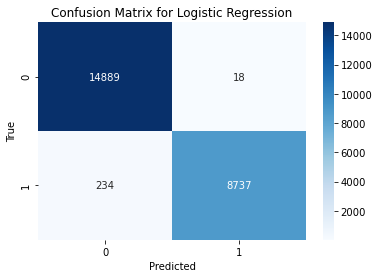

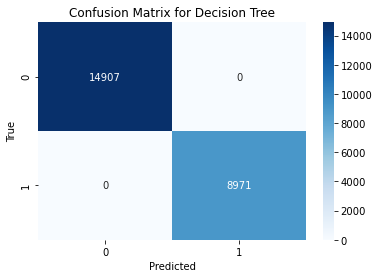

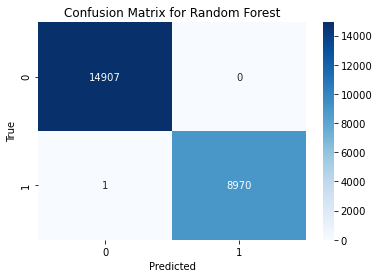

In [300]:
# Vizualize the predicted value and actual value by confusion Matrix
for key, value in q.items():
    for i, y_p in enumerate(value):
        if len(y_test) != len(y_p):
            raise ValueError(f"Inconsistent number of samples for {key}: {len(y_test)} vs {len(y_p)}")

        cm = confusion_matrix(y_test, y_p)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix for {key}')
        plt.show()

In [314]:
total_counts_by_hotel = df.groupby('hotel').is_canceled.count()
total_counts_by_hotel

hotel
City Hotel      79330
Resort Hotel    40060
Name: is_canceled, dtype: int64

In [315]:
cancellation_counts_by_hotel = df.groupby('hotel').is_canceled.sum()
cancellation_counts_by_hotel

hotel
City Hotel      33102
Resort Hotel    11122
Name: is_canceled, dtype: int64